# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Построим распределение точек и отобразим их на графике.

In [38]:
count = 100

In [18]:
X = np.random.rand(count, 1)
y = 4 + 8 * X + np.random.randn(count, 1)

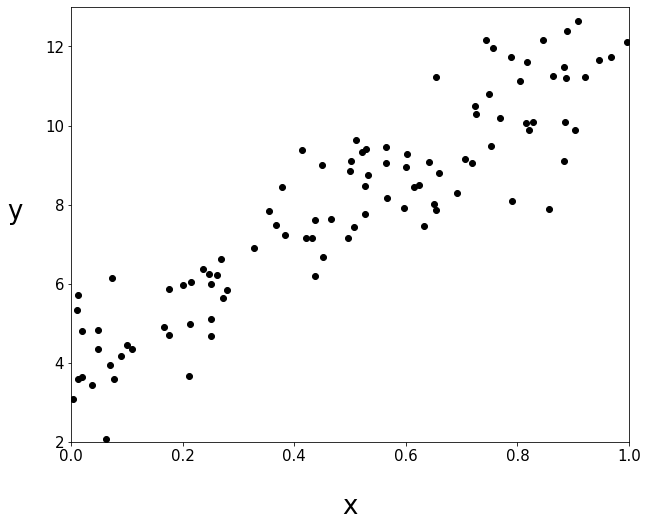

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Чтобы аппроксимировать данные точки, необходимо найти параметры модели линейной регрессии. Это можно сделать с помощью **нормального уравнения**.

$\overline{\theta} = (X^TX)^{-1}X^Ty$

In [40]:
X_b = np.c_[np.ones((count, 1)), X]
thetas = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [41]:
thetas

array([[3.9073801 ],
       [8.16167658]])

Как можно видеть, это очень близко сходится с параметрами $\theta_0$ и $\theta_1$, равные 4 и 8 соответственно. Такое отклонение происходит из-за добавочного шума.

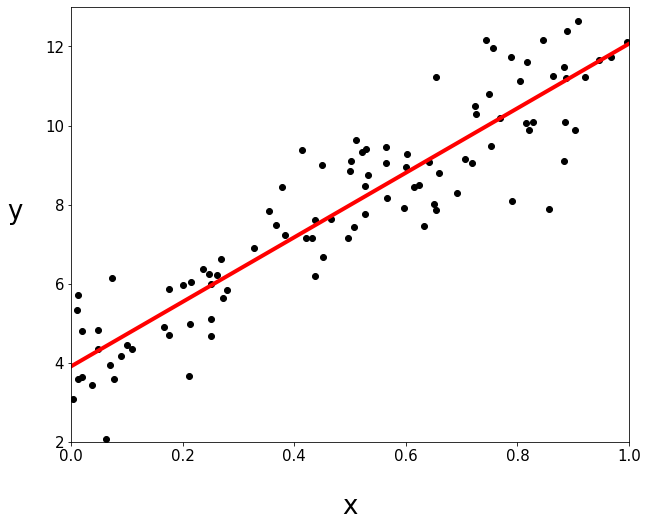

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), 'r', linewidth=4)
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Давайте посмотрим, что выдаст обученная модель линейной регрессии из Sklearn.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(array([3.9073801]), array([[8.16167658]]))

Как можно заметить, результаты практически полностью совпадают. Опять же, смещение происходит только из-за шума в самих данных.

# Градиентный спуск